In [2]:
# Importing required python modules and libraries:

In [3]:

import math
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import plotly.express as px
import plotly.graph_objects as go

In [11]:
ipl_alltime=pd.read_csv(r'E:\My downloads\IPL_Ball_by_Ball_2008_2022.csv')

In [34]:
ipl_match=pd.read_csv(r'E:\My downloads\IPL_Matches_2008_2022.csv')

In [35]:
ipl_alltime.head(5)


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [36]:

ipl_match.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [37]:

ipl_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [38]:

ipl_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [39]:
# Data cleaning by filling the missing values with zero and replacing two duplicate names with single one

In [40]:
ipl_match['City'].fillna('UAE',inplace=True)

ipl_match['SuperOver'].fillna('N',inplace=True)

ipl_match['WinningTeam'].fillna('No_one',inplace=True)

ipl_match['Player_of_Match'].fillna('No_one',inplace=True)

ipl_match['Margin'].fillna(1.00,inplace=True)

ipl_match['method'].fillna('usual',inplace=True)


In [41]:
ipl_match.replace(['Rising Pune Supergiant','2007/08','2009/10','2020/21','Delhi Daredevils','Kings XI Punjab',
                   'Arun Jaitley Stadium',
                   'Feroz Shah Kotla',
                   'Brabourne Stadium',
                   'Dr DY Patil Sports Academy',
                   'Eden Gardens',
                   'M Chinnaswamy Stadium',
                   'MA Chidambaram Stadium',
                   'MA Chidambaram Stadium, Chepauk',
                   'Maharashtra Cricket Association Stadium',
                   'Punjab Cricket Association IS Bindra Stadium',
                   'Punjab Cricket Association IS Bindra Stadium, Mohali',
                   'Rajiv Gandhi International Stadium',
                   'Sardar Patel Stadium, Motera',
                   'Zayed Cricket Stadium, Abu Dhabi',
                   'Wankhede Stadium'],
                   ['Rising Pune Supergiants','2008','2010','2020','Delhi Capitals','Punjab Kings',
                    'Arun Jaitley Stadium, Delhi',
                    'Arun Jaitley Stadium, Delhi',
                    'Brabourne Stadium, Mumbai',
                    'Dr DY Patil Sports Academy, Mumbai',
                    'Eden Gardens, Kolkata',
                    'M.Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk, Chennai',
                    'MA Chidambaram Stadium, Chepauk, Chennai',
                    'Maharashtra Cricket Association Stadium, Pune',
                    'Punjab Cricket Association Stadium, Mohali',
                    'Punjab Cricket Association Stadium, Mohali',
                    'Rajiv Gandhi International Stadium, Uppal',
                    'Narendra Modi Stadium, Ahmedabad',
                    'Sheikh Zayed Stadium',
                    'Wankhede Stadium, Mumbai' ],
                    inplace=True)

In [42]:
# ANALYSIS OF THE CLEANED DATA 
# season wise distribution of all IPL matches

In [43]:

match_pseason=ipl_match['Season'].value_counts().reindex(['2008','2009','2010','2011','2012','2013','2014','2015','2016',
 
 
                                                          '2017','2018','2019','2020','2021','2022'])

X=np.array(match_pseason.index)
Y=Y=np.array(match_pseason.values)
figure=px.bar(x=X,y=Y)
figure.update_layout(title='IPL matches Vs Season',
                   xaxis_title='Season',
                   yaxis_title='Matches played',
                   #lables={x:'Season',y:'Matches played'}
                    )
figure.show()
    


In [44]:
# Winning Team of each IPL season

In [45]:

ipl_match[ipl_match['MatchNumber']=='Final'].loc[:,['Season','WinningTeam']]


,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


In [46]:
# Performance of each team appeared in the IPL

In [47]:

win_per=ipl_match.loc[:,['Team1','Team2','WinningTeam']]
win_per['count']=0
win_per_final=pd.DataFrame(win_per.groupby('Team1')['count'].count()+win_per.groupby('Team2')['count'].count())
win_per_final1=pd.DataFrame(win_per.groupby('WinningTeam')['count'].count())
win_per_final1.drop(index='No_one',inplace=True)
win_per_final['Won']=win_per_final1['count']
win_per_final['no_results']=[0,0,2,0,0,0,0,0,0,1,0,2,0,3,0]
win_per_final['lost']=win_per_final['count']-win_per_final['Won']-win_per_final['no_results']
win_per_final.index.name='Team'
win_per_final.columns=['Total_Match','won','No_results','Lost']

In [48]:
win_per_final

,Total_Match,won,No_results,Lost
Team,,,,
Chennai Super Kings,208,121,0,87
Deccan Chargers,75,29,0,46
Delhi Capitals,224,103,2,119
Gujarat Lions,30,13,0,17
Gujarat Titans,16,12,0,4
Kochi Tuskers Kerala,14,6,0,8
Kolkata Knight Riders,223,114,0,109
Lucknow Super Giants,15,9,0,6
Mumbai Indians,231,131,0,100


In [49]:
win_per_final.iloc[14,1:4]

won           75
No_results     0
Lost          77
Name: Sunrisers Hyderabad, dtype: int64

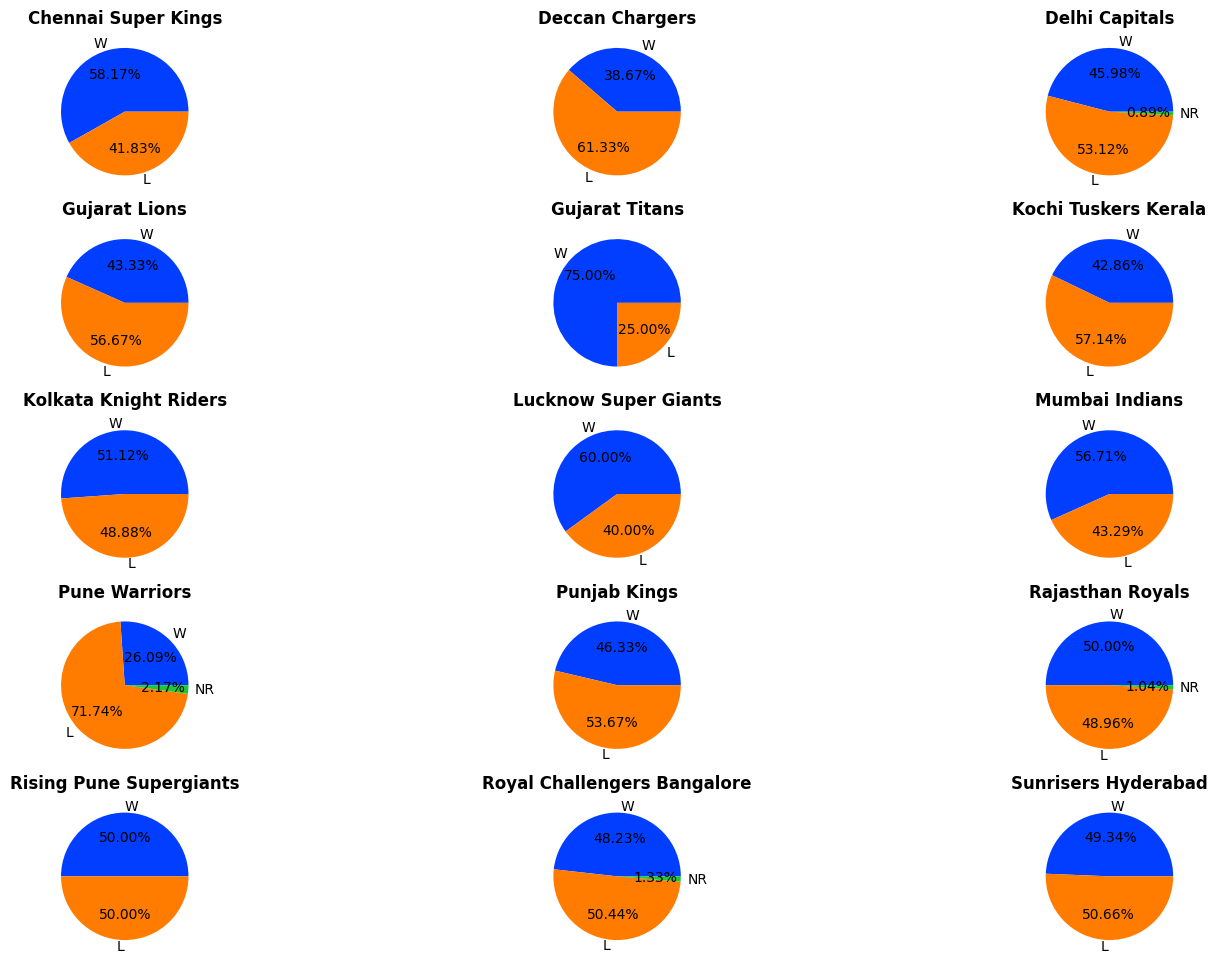

In [50]:

j=1
plt.figure(figsize=(18,12),frameon=True)
for i in win_per_final.index:
    plt.subplot(5,3,j)
    j+=1
    palette_color =sns.color_palette('bright')
    if(win_per_final.loc[i,'No_results']!=0):
        plt.pie(win_per_final.loc[i,['won','Lost','No_results']],labels=['W','L','NR'],
                colors=palette_color,
                autopct='%0.2f%%')
        plt.title("%s"%(i),fontweight='bold')
    else:
        plt.pie(win_per_final.loc[i,['won','Lost']],labels=['W','L'],
                colors=palette_color,
                autopct='%0.2f%%')
        plt.title("%s"%(i),fontweight='bold')

In [51]:
# Venue wise distribution and analysis of all IPL matches

In [52]:
ipl_venue=ipl_match.loc[:,['Venue']]
ipl_venue['Match Played']=1
ipl_venue_details=ipl_venue.groupby('Venue').sum()

ipl_venue_wonfirst=pd.DataFrame(ipl_match[ipl_match['WonBy']=='Runs'].loc[:,'Venue'])
ipl_venue_wonfirst['Match_won_by_batting_1st']=1
ipl_venue_wonfirst.groupby('Venue').sum()


ipl_venue_details['Match_won_by_batting_1st']=ipl_venue_wonfirst.groupby('Venue').sum()['Match_won_by_batting_1st']
ipl_venue_details.loc['Green Park','Match_won_by_batting_1st']=0
ipl_venue_details['%age']=round((ipl_venue_details['Match_won_by_batting_1st']/ipl_venue_details['Match Played'])*100,2)
ipl_venue_details.sort_values(by='Match Played',ascending=False)

,Match Played,Match_won_by_batting_1st,%age
Venue,,,
"Wankhede Stadium, Mumbai",104,47.0,45.19
M.Chinnaswamy Stadium,80,33.0,41.25
"Eden Gardens, Kolkata",79,33.0,41.77
"Arun Jaitley Stadium, Delhi",78,36.0,46.15
"MA Chidambaram Stadium, Chepauk, Chennai",67,39.0,58.21
"Rajiv Gandhi International Stadium, Uppal",64,28.0,43.75
"Punjab Cricket Association Stadium, Mohali",56,24.0,42.86
Sawai Mansingh Stadium,47,15.0,31.91
Dubai International Cricket Stadium,46,21.0,45.65


In [53]:
# Analysis to find if toss result or decision made after winning the toss affects the result of the match:¶

from plotly.subplots import make_subplots

In [54]:
fig = make_subplots(
                    rows=1, cols=2,
                    specs=[[{"type": "domain"}, {"type": "domain"}]],
                    subplot_titles=("IPL Total Wins","IPL Total Wins")
                    )

fig.add_trace(go.Pie(values=ipl_match['WonBy'].value_counts().values,
                    labels=['Batting First','Bowling First','SO','NR']),
              row=1, col=1)

fig.add_trace(go.Pie(values =[ipl_match[ipl_match['TossWinner']==ipl_match['WinningTeam']].shape[0],
                    ipl_match.shape[0]-ipl_match[ipl_match['TossWinner']==ipl_match['WinningTeam']].shape[0]],
                    labels=['Toss Winner','Rest(NR&SO included)'],),
              row=1, col=2)

fig.update_layout(
                  height=600,
                  showlegend=False
                  )

fig.show()

NameError: name 'make_subplots' is not defined

In [ ]:
# conclusion:
#it is clear that neither toss decision nor the toss result puts any team in an advantegious position in the game 

In [ ]:
# Decision made after winning the toss in IPL

In [ ]:

ipl_match['TossDecision'].value_counts()


In [ ]:

fig = px.pie(values=ipl_match['TossDecision'].value_counts().values,
             names=ipl_match['TossDecision'].value_counts().index,
             title='IPL Toss Decision')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
# conclusion:
#it is clear from the graph that if a team wins the toss it is most probbale that it will choose to bowl.

In [ ]:
# Batting and Bowling statistics of indivudual players

In [ ]:
# Getting the record of runs and boundaries scored by individual players in IPL

In [ ]:

ipl_totalruns=ipl_alltime.loc[:,['batter','batsman_run']].groupby('batter').sum()

ipl_totalsixes=ipl_alltime[ipl_alltime['batsman_run']==6].loc[:,['batter','batsman_run']].groupby('batter').count()

ipl_totalfours=ipl_alltime[ipl_alltime['batsman_run']==4].loc[:,['batter','batsman_run']].groupby('batter').count()

ipl_totalballs=ipl_alltime.loc[:,['batter','batsman_run']].groupby('batter').count()
ipl_totalballs.columns=['Balls_played']

ipl_totalballs['Runs']=ipl_totalruns['batsman_run']
ipl_totalballs['6s']=ipl_totalsixes['batsman_run']
ipl_totalballs['6s'].fillna(0,inplace=True)
ipl_totalballs['4s']=ipl_totalfours['batsman_run']
ipl_totalballs['4s'].fillna(0,inplace=True)
ipl_totalballs['SR']=round(ipl_totalballs['Runs']/ipl_totalballs['Balls_played']*100,2)
ipl_totalballs['Bpb']=round(ipl_totalballs['Balls_played']/(ipl_totalballs['6s']+ipl_totalballs['4s']),2)


In [ ]:
ipl_totalballs.sort_values(by='Runs',ascending=False)

In [ ]:
# From the record we now analyse which IPL batter playes the least no. of balls to score a boundary? and which batter score runs with highest strike rate? ,the result of the analysis in the form of graphs is as shown:

In [ ]:
x2=ipl_totalballs[ipl_totalballs['Balls_played']>1000].sort_values(by='SR',ascending=False).iloc[0:10,:].index
y2=ipl_totalballs[ipl_totalballs['Balls_played']>1000].sort_values(by='SR',ascending=False).iloc[0:10,:]['SR']


x3=ipl_totalballs[ipl_totalballs['Balls_played']>1000].sort_values(by='Bpb').iloc[0:10,:].index
y3=ipl_totalballs[ipl_totalballs['Balls_played']>1000].sort_values(by='Bpb').iloc[0:10,:]['Bpb']

In [ ]:
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Batsman with best SR","Batsman hitting boundary most often"))

fig.add_trace(go.Bar(x=y2.index,
                     y=y2),
              row=1, 
              col=1)

fig.add_trace(go.Bar(x=y3.index,
                     y=y3),
              row=1,
              col=2)
fig.show()

In [ ]:
# Total number of balls played by all battters combined together in the IPL is :

In [ ]:

ipl_totalballs['Balls_played'].sum()


In [ ]:
# of all these balls total number of balls which were hit for a boundary is:

In [ ]:

(ipl_totalballs['6s']+ipl_totalballs['4s']).sum()

In [ ]:
# on an average total balls played by a batsman to hit a boundry in an IPL match is given by:¶

In [ ]:

round(ipl_totalballs['Balls_played'].sum()/(ipl_totalballs['6s']+ipl_totalballs['4s']).sum(),2)


In [ ]:
# Finding the distributions of ball number of an over with runs scored on the ball and wickets fallen 

In [ ]:
y4=ipl_alltime.loc[:,['ballnumber','batsman_run','isWicketDelivery']].groupby('ballnumber').sum()['batsman_run']

y5=ipl_alltime.loc[:,['ballnumber','batsman_run','isWicketDelivery']].groupby('ballnumber').sum()['isWicketDelivery']

In [ ]:
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Ball_no.Vs Runs_Scored","Ball_no Vs Wickets fell"))

fig.add_trace(go.Bar(x=y4.index,
                     y=y4),
              row=1, 
              col=1)

fig.add_trace(go.Bar(x=y5.index,
                     y=y5),
              row=1,
              col=2)
fig.show()

#conclusion:from the graph it is clear that on the forth ball of the over tmaximum wickets have fallen and also maximum runs have been scored

In [ ]:
# Getting the data about the way of dismissals of the batters in IPL

In [ ]:

ipl_dismissal=ipl_alltime[ipl_alltime['isWicketDelivery']==1].loc[:,['bowler','isWicketDelivery','kind']]['kind'].value_counts()


In [ ]:
figure=px.bar(x=ipl_dismissal.index,
              y=ipl_dismissal.values)
figure.update_layout(title='IPL way of dismissals',
                   xaxis_title='Type oDismissalf ',
                   yaxis_title='Number'
                    )
figure.show()
    

In [ ]:
# Getting the record of bowls bowled and wickets claimed by individual players in IPL

In [ ]:

ipl_wickets=ipl_alltime[ipl_alltime['isWicketDelivery']==1].loc[:,['bowler','isWicketDelivery','kind']]


ipl_wicketsfinal=pd.DataFrame(ipl_wickets[(ipl_wickets['kind']!='run out')|
            (ipl_wickets['kind']=='retired hurt')|
            (ipl_wickets['kind']!='obstructing the field')|
            (ipl_wickets['kind']!='retired out')].groupby('bowler')['isWicketDelivery'].sum()).sort_values(by='isWicketDelivery',ascending=False)


ipl_bowlers=pd.DataFrame(ipl_alltime['bowler'])
ipl_bowlers['count']=1
ipl_bowling=ipl_bowlers.groupby('bowler').sum()
ipl_bowling['Runs']=ipl_alltime.loc[:,['bowler','total_run']].groupby('bowler').sum()['total_run']
ipl_bowling['wickets']=ipl_wicketsfinal['isWicketDelivery']
ipl_bowling['wickets'].fillna(0,inplace=True)
ipl_bowling['bpw']=round(ipl_bowling['count']/ipl_bowling['wickets'],2)
ipl_bowling['economy']=round(ipl_bowling['Runs']/ipl_bowling['count']*6,2)

ipl_bowling.sort_values(by='wickets',ascending=False)

In [ ]:
# From the record we now analyse which IPL bowler bowls the least no. of balls to claim a wicket and which bowler bowls more economically? ,the result of the analysis in the form of graphs is as shown:

In [ ]:

x6=ipl_bowling[ipl_bowling['count']>1000].sort_values(by='bpw').iloc[0:10,:]['bpw']


x7=ipl_bowling[ipl_bowling['count']>1000].sort_values(by='economy').iloc[0:10,:]['economy']

In [ ]:
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Avg. balls per wicket","Most economical bowlers"))

fig.add_trace(go.Bar(x=x6.index,
                     y=x6),
              row=1, 
              col=1)

fig.add_trace(go.Bar(x=x7.index,
                     y=x7),
              row=1,
              col=2)
fig.show()